<a href="https://colab.research.google.com/github/saber-030/Empirical-Analysis-of-Approximation-Algorithms/blob/main/Job_Scheduling_Algorithms_Max_Lateness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Job Scheduling - Maximum Lateness**

# **Problem Descripion**

Given an uni-processor system and an array of jobs where every job has a release date, due date and processing time, find the sequence which minimizes the maxmimum lateness among all the jobs.

$\mathbf{Lateness_i} = max(0, endTime_i - dueDate_i$)

$\mathbf{Maximum Lateness} = \max_{i=1}^n Lateness_i$




## **Inputs**

*Job and process have the same meaning and can be swapped*

- procTime = Processing time for a process. 
  - *Range: [1, 100]*


- relDate = Release date (when the process becomes available for processing)
  - *Range: [0, 100]*


- dueDate = When process is due. dueDate can be negative i.e. process is due even before it was available
  - *Range: [-100, 0)*

## **Scheduling Algorithms**

1.   Brute Force, BF
2.   First-Come First-Serve Scheduling, FCFS
3.   Shortest-Job-First Scheduling, SJF
4.   Earliest Due Date First Scheduling, EDD
5.   Longest-Job-First Scheduling, LJF

# Import Statements

In [ ]:
import numpy as np
import itertools
import heapq
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
from sklearn.metrics import mean_squared_error

# Test Variables
Initialize seed and global variables

Small single arrays, that we use for testing/debugging purposes


In [ ]:
procTime = np.random.randint(1,101,8)
relDate = np.random.randint(0,101,8)
dueDate = np.random.randint(-100,101,8)

print(procTime)
print(relDate)
print(dueDate)

[67 76 14 86 89  5 31 30]
[95 72 59 55 19 88 38 23]
[  9  40  68   1  19 -11  42  -6]


In [ ]:
procTime2 = (2, 1, 4)
relDate2 = (0, 2, 1)
dueDate2 = (-1, 1, 10)

# Scheduling Algorithms

## Brute Force Algorithm (Optimal)
> Exponential time algorithm, that generates and checks all the permutations of the given set of jobs to search for the schedule which has the minimum max lateness. Since every possible combination is analysed, it always produces the optimal solution.

---
**Input:**
- procTime
- relDate
- dueDate

**Output:**
- min_lateness
- best_job_order
- function_total_time

---
**Implementation and Details:**
- First we combine the inputs in a unified data structure, along with adding an index.
- Then, we generate all permutations of the input array and iterate over each permutation to calculate the max lateness of that permutation.
  - If the value of max lateness is less than the min_lateness value, we update the min_lateness value and the best_job_order.

In [ ]:
def bruteForce(procTime, relDate, dueDate):
  # for runtime and time complexity
  function_start_time = time.time()
  best_job_order = list()
  
  params = []
  
  # Create a unified Data Structure with 3-tuple for each inputs
  for i in range(len(procTime)):
    tuple = (procTime[i], relDate[i], dueDate[i], i)
    params.append(tuple)

  # Generate all permutations of inputs
  param_list = list(itertools.permutations(params))
  min_lateness = 100000

  # Iterate over the inputs to check each Schedule and find the optimal
  for i in param_list:
    tuple = i
    end_time = 0
    lateness = 0 
    curr_job_order = list()

    # calculate lateness and job order for each permutation of the parameters (params)
    for j in tuple:

      #define start, end and lateness
      start_time = max(j[1], end_time)
      end_time = start_time + j[0]
      lateness = max(lateness, end_time - j[2])
      curr_job_order.append(j[3]);
    
    # update minimum lateness and best job order if it is the current permutation with minimum lateness
    if lateness <= min_lateness:
      min_lateness = lateness
      best_job_order = curr_job_order
    # min_lateness = min(lateness, min_lateness)
  
  # print(min_lateness)

  function_end_time = time.time()  

  # check total run time for the function
  function_total_time = function_end_time - function_start_time
  return min_lateness, best_job_order, function_total_time

In [ ]:
min_lateness, best_job_order, function_total_time = bruteForce(procTime2, relDate2, dueDate2)
print(min_lateness)
print(best_job_order)
print(function_total_time)

3
[0, 1, 2]
2.6941299438476562e-05


## First Come First Serve Scheduling

> FCFS is the simplest scheduling algorithm which serves the first request in FIFO fashion. Jobs released earliest are given preference in the available job pool.

---
**Input:**
- procTime
- relDate
- dueDate

**Output:**
- min_lateness
- best_job_order
- function_total_time

---
**Implementation and Details:**
- First we combine the inputs in a unified data structure, along with adding an index.
- Then, we sort the input in increasing order of relDate and iterate over the sorted inputs to calculate the max lateness.

In [ ]:
def FCFS(procTime, relDate, dueDate):
  # for runtime and time complexity
  function_start_time = time.time() 
  best_job_order = list() 
  
  params = []
  jobId = [i for i in range(len(procTime))]

  # Sort the inputs based on the Release Dates
  relDate_s, dueDate_s, procTime_s, jobId_s = map(list, zip(*sorted(zip(relDate, dueDate, procTime, jobId), reverse=False)))
  
  # Create a unified Data Structure with 3-tuples for each input
  for i in range(len(procTime)):
    tuple = (procTime_s[i], relDate_s[i], dueDate_s[i], jobId_s[i])
    params.append(tuple)

  end_time = 0
  lateness = 0 

  # Iterate over the inputs in sorted order and calculate the maximum lateness
  for i in params:
    start_time = max(i[1], end_time)
    end_time = start_time + i[0]
    lateness = max(lateness, end_time - i[2])
    best_job_order.append(int(i[3]))

  # print(lateness)
  function_end_time = time.time()  
  function_total_time = function_end_time - function_start_time
  return lateness, best_job_order, function_total_time

In [ ]:
min_lateness, best_job_order, function_total_time = FCFS(procTime2, relDate2, dueDate2)
print(min_lateness)
print(best_job_order)
print(function_total_time)

6
[0, 2, 1]
1.8596649169921875e-05


## Shortest Job First Scheduling


> SJF gives preference to the job with the shortest processing time in the available job pool.

---
**Input:**
- procTime
- relDate
- dueDate

**Output:**
- min_lateness
- best_job_order
- function_total_time

---
**Implementation and Details:**
- First we combine the inputs in a unified data structure, along with adding an index.
- Then, we sort the input in increasing order of relDate.
- At each step *i*:
  - We iterate over the sorted inputs (*i* to *n-1*) to find *index* of the next job with the minimum procTime such that its relDate is less than the current job's end time.
  - Calculate the end time of next job.
  - Swap the rows with indices *i* and *index*.
- Calculate the max lateness of all jobs

In [ ]:
def SJF(procTime, relDate, dueDate):
  # for runtime and time complexity
  function_start_time = time.time()
  best_job_order = list()
  
  # define numpy array for storing parameters
  params=np.zeros((0,6))
  jobId = [i for i in range(len(procTime))]
  
  # sort the data as per relData
  relDate_s, dueDate_s, procTime_s, jobId_s = map(list, zip(*sorted(zip(relDate, dueDate, procTime, jobId), reverse=False)))
  
  #Data preprocessing to convert it into usable format
  for i in range(len(procTime)):
    list1=(i+1,relDate_s[i], procTime_s[i], 0,dueDate_s[i], jobId_s[i])
    params=np.vstack([params,list1])

  #Initialize lateness 
  lateness=0

  #keep track of swapping indices
  index=0  

  #total time when execution of first job is finished
  params[0][3]=params[0][1]+params[0][2]  
  best_job_order.append(int(params[0][5]))

  #Get number of rows 
  n,col=params.shape

  #run from 1 to n-1 because 1st job (index 0) will always run first. Total n-1 processes will run as a result of this loop
  for i in range(1,n):   
    #find time when currently processing job gets over
    curr_time=params[i-1][3]      
    #assume the next indice has job of minimum procTime
    minimum=params[i][2]  

    job_available = False

    #find the minimum time among all currently available jobs (relDate<mimimum)
    while job_available == False:
      for j in range(i,n):  
        if (curr_time>=params[j][1] and minimum >= params[j][2]):
          minimum,index=params[j][2],j
          job_available = True
      curr_time += 1

    #update the time when the available job with minimum time will get over (new time)        
    params[index][3]=curr_time+params[index][2]   
    
    #Swap the rows 
    for z in range(0,6):
      params[index][z],params[i][z]=params[i][z],params[index][z]  
    best_job_order.append(int(params[i][5]))

  # Execution of all n processes is complete! Now we calculate maximum lateness
  for i in range(0,n):
    #lateness=(Completion Time)-(Due date)
    lateness=max(lateness,params[i][3]-params[i][4])  

  function_end_time = time.time()  
  function_total_time = function_end_time - function_start_time
  return lateness, best_job_order, function_total_time

In [ ]:
min_lateness, best_job_order, function_total_time = SJF(procTime2, relDate2, dueDate2)
print(min_lateness)
print(best_job_order)
print(function_total_time)

3.0
[0, 1, 2]
0.00021147727966308594


## Earliest Due Date Scheduling


> EDD gives preference to the job with the earliest deadline in the available job pool.

---
**Input:**
- procTime
- relDate
- dueDate

**Output:**
- min_lateness
- best_job_order
- function_total_time

---
**Implementation and Details:**
- First we combine the inputs in a unified data structure, along with adding an index.
- Then, we sort the input in increasing order of relDate.
- At each step *i*:
  - We iterate over the sorted inputs (*i* to *n-1*) to find *index* of next job with the minimum dueDate.
  - Calculate the end time of next job.
  - Swap the rows with indices *i* and *index*.
- Calculate the max lateness of all jobs

In [ ]:
def EDD(procTime, relDate, dueDate):
  function_start_time = time.time()
  best_job_order = list()
  
  #Sort according to arrival time
  params=np.zeros((0,6))
  jobId = [i for i in range(len(procTime))]
  
  relDate_s, dueDate_s, procTime_s, jobId_s = map(list, zip(*sorted(zip(relDate, dueDate, procTime, jobId), reverse=False)))
  
  #Data preprocessing to convert it into usable format
  for i in range(len(procTime)):
    list1=(i+1,relDate_s[i], procTime_s[i], 0,dueDate_s[i], jobId_s[i])
    params=np.vstack([params,list1])

  #Initialize lateness 
  lateness=0

  #keep track of swapping indices
  index=0  

  #total time when execution of first job is finished
  params[0][3]=params[0][1]+params[0][2]  
  best_job_order.append(int(params[0][5]))

  #Get number of rows 
  n,col=params.shape

  #run from 1 to n-1 because 1st job (index 0) will always run first. Total n-1 processes will run as a result of this loop
  for i in range(1,n):
    #find time when currently processing job gets over
    curr_time=params[i-1][3]      
    #assume the next indice has job of minimum dueDate
    minimum=params[i][4]

    #find the lowest dueDate time among all currently available jobs (dueDate<mimimum)
    for j in range(i,n):
      if (minimum >= params[j][4]):
        minimum,index=params[j][4],j
    
    #update the time when the available job with lowest dueDate will get over (new time)  
    params[index][3]=max(curr_time, params[index][1])+params[index][2] 

    #Swap the rows 
    for z in range(0,6):
      params[index][z],params[i][z]=params[i][z],params[index][z]  

    best_job_order.append(int(params[i][5]))

  # Execution of all n processes is complete! Now we calculate maximum lateness
  for i in range(0,n):
    #lateness=(Completion Time)-(due date)
    lateness=max(lateness,params[i][3]-params[i][4])  

  # print(params)

  function_end_time = time.time()  
  function_total_time = function_end_time - function_start_time
  return lateness, best_job_order, function_total_time

In [ ]:
min_lateness, best_job_order, function_total_time = EDD(procTime2, relDate2, dueDate2)
print(min_lateness)
print(best_job_order)
print(function_total_time)

3.0
[0, 1, 2]
0.000232696533203125


## Largest Job First Scheduling


> LJF gives preference to the job with the longest processing time in the available job pool.

---
**Input:**
- procTime
- relDate
- dueDate

**Output:**
- min_lateness
- best_job_order
- function_total_time

---
**Implementation and Details:**
- First we combine the inputs in a unified data structure, along with adding an index.
- Then, we sort the input in increasing order of relDate.
- At each step *i*:
  - We iterate over the sorted inputs (*i* to *n*) to find *index* of the next job with the maximum procTime such that its relDate is less than the current job's end time.
  - Calculate the end time of next job.
  - Swap the rows with indices *i* and *index*.
- Calculate the max lateness of all jobs

In [ ]:
def LJF(procTime, relDate, dueDate):
  function_start_time = time.time()
  best_job_order = list()

#Sort according to arrival time
  params=np.zeros((0,6))

  jobId = [i for i in range(len(procTime))]
  relDate_s, dueDate_s, procTime_s, jobId_s = map(list, zip(*sorted(zip(relDate, dueDate, procTime, jobId), reverse=False)))
  
  #Data preprocessing to convert it into usable format
  for i in range(len(procTime)):
    list1=(i+1,relDate_s[i], procTime_s[i], 0,dueDate_s[i], jobId_s[i])
    params=np.vstack([params,list1])

  #Initialize lateness 
  lateness=0

  #keep track of swapping indices
  index=0  

  #total time when execution of first job is finished
  params[0][3]=params[0][1]+params[0][2]  
  best_job_order.append(int(params[0][5]))

  #Get number of rows 
  n,col=params.shape

  #run from 1 to n-1 because 1st job (index 0) will always run first. Total n-1 processes will run as a result of this loop
  for i in range(1,n):
    #find time when currently processing job gets over
    curr_time=params[i-1][3]
    #assume the next indice has job of maximum procTime
    maximum=params[i][2]

    job_available = False
    #find the maximum time among all currently available jobs (relDate>time)
    while job_available == False:
      for j in range(i,n):
        if (curr_time>=params[j][1] and maximum <= params[j][2]):
          maximum,index=params[j][2],j
          job_available = True
      curr_time += 1

    #update the time when the available job with maximum time will get over (new time)  
    params[index][3]=curr_time+params[index][2]

    #Swap the rows 
    for z in range(0,5):
      params[index][z],params[i][z]=params[i][z],params[index][z]  
    best_job_order.append(int(params[i][5]))

  # Execution of all n processes is complete! Now we calculate maximum lateness
  for i in range(0,n):
    #lateness=(Completion Time)-(due date)
    lateness=max(lateness,params[i][3]-params[i][4])  

  function_end_time = time.time()  
  function_total_time = function_end_time - function_start_time
  return lateness, best_job_order, function_total_time

In [ ]:
min_lateness, best_job_order, function_total_time = LJF(procTime2, relDate2, dueDate2)
print(min_lateness)
print(best_job_order)
print(function_total_time)

8.0
[0, 2, 1]
0.0001983642578125


# Tests

In [ ]:
LJF(procTime, relDate, dueDate)

(435.0, [4, 7, 6, 3, 2, 1, 5, 0], 0.00046443939208984375)

In [ ]:
FCFS(procTime, relDate, dueDate)

(408, [4, 7, 6, 3, 2, 1, 5, 0], 7.987022399902344e-05)

In [ ]:
EDD(procTime, relDate, dueDate)

(361.0, [4, 5, 7, 3, 0, 1, 6, 2], 0.0016465187072753906)

In [ ]:
SJF(procTime, relDate, dueDate)

(423.0, [4, 5, 2, 7, 6, 0, 1, 3], 0.0006089210510253906)

# Distance Metrics


> Hamming Distance: Number of places where the 2 job permutations differ

> RMS: Root mean squared distance between 2 different job orders

> Manhattan Distance: Sum of the absolute differences between the two job orders




In [ ]:
def HD(perm1, perm2):
  hd = 0
  for i in range(len(perm1)):
    if perm1[i]!=perm2[i]:
      hd+=1
  return hd

In [ ]:
def RMS(perm1, perm2):
  return mean_squared_error(perm1, perm2)

In [ ]:
def MHN(perm1, perm2):
  return sum(abs(val1-val2) for val1, val2 in zip(perm1, perm2))

## Testing Distance Metrics

In [ ]:
a = [0,1,2]
b = [0,2,1]
print(HD(a,b))
print(RMS(a,b))
print(MHN(a,b))

2
0.6666666666666666
2


# Visualization and Results

## Simulate 100 random instances for n=2 to 8 

In [ ]:
%%capture
# Introduce Lateness variables for all Algorithms
x_ljf_lateness=[]
x_sjf_lateness=[]
x_edd_lateness=[]
x_fcfs_lateness=[]

# Introduce Hamming Distance variables for all Algorithms
x_ljf_hd=[]
x_sjf_hd=[]
x_edd_hd=[]
x_fcfs_hd=[]

# Introduce Time taken variables for all Algorithms
x_ljf_time=[]
x_sjf_time=[]
x_edd_time=[]
x_fcfs_time=[]
x_brute_time=[]

# Introduce Root Mean Square variables for all Algorithms
x_ljf_rms=[]
x_sjf_rms=[]
x_edd_rms=[]
x_fcfs_rms=[]

# Introduce Manhattan Distance variables for all Algorithms
x_ljf_mhn=[]
x_sjf_mhn=[]
x_edd_mhn=[]
x_fcfs_mhn=[]


for i in range(2, 10):
  ljf = []
  fcfs = []
  edd = []
  sjf = []

  ljf_hd = []
  fcfs_hd = []
  edd_hd = []
  sjf_hd = []

  brute_time = []
  ljf_time = []
  fcfs_time = []
  edd_time = []
  sjf_time = []

  ljf_rms = []
  fcfs_rms = []
  edd_rms = []
  sjf_rms = []

  ljf_mhn = []
  fcfs_mhn = []
  edd_mhn = []
  sjf_mhn = []


  print(">>> Input size:",i)
  for j in tqdm(range(1, 101)):

    # Initialize a seed for reproducible results 
    np.random.seed(j*j)

    # Initialize procTime, relDate and dueDate variables with given seed
    procTime = np.random.randint(1,101,i)
    relDate = np.random.randint(0,101,i)
    dueDate = np.random.randint(-100,0,i)
    
    # Calculate minimum lateness, best job order and total time taken for all 5 algorithms
    bf_min_lateness, bf_best_job_order, bf_function_total_time = bruteForce(procTime, relDate, dueDate)
    lj_min_lateness, lj_best_job_order, lj_function_total_time = LJF(procTime, relDate, dueDate)
    fc_min_lateness, fc_best_job_order, fc_function_total_time = FCFS(procTime, relDate, dueDate)
    ed_min_lateness, ed_best_job_order, ed_function_total_time = EDD(procTime, relDate, dueDate)
    sj_min_lateness, sj_best_job_order, sj_function_total_time = SJF(procTime, relDate, dueDate)

    # Hamming Distance
    fc_hd = HD(fc_best_job_order, bf_best_job_order)
    ed_hd = HD(ed_best_job_order, bf_best_job_order)
    sj_hd = HD(sj_best_job_order, bf_best_job_order)
    lj_hd = HD(lj_best_job_order, bf_best_job_order)

    # RMS
    fc_rms = RMS(fc_best_job_order, bf_best_job_order)
    ed_rms = RMS(ed_best_job_order, bf_best_job_order)
    sj_rms = RMS(sj_best_job_order, bf_best_job_order)
    lj_rms = RMS(lj_best_job_order, bf_best_job_order)

    # MHN
    fc_mhn = MHN(fc_best_job_order, bf_best_job_order)
    ed_mhn = MHN(ed_best_job_order, bf_best_job_order)
    sj_mhn = MHN(sj_best_job_order, bf_best_job_order)
    lj_mhn = MHN(lj_best_job_order, bf_best_job_order)

    # Ratio between lateness of algorithm vs brute force
    fcfs.append(fc_min_lateness/bf_min_lateness)
    edd.append(ed_min_lateness/bf_min_lateness)
    sjf.append(sj_min_lateness/bf_min_lateness)
    ljf.append(lj_min_lateness/bf_min_lateness)

    # Hamming Distance
    fcfs_hd.append(fc_hd)
    edd_hd.append(ed_hd)
    sjf_hd.append(sj_hd)
    ljf_hd.append(lj_hd)

    # RMS
    fcfs_rms.append(fc_rms)
    edd_rms.append(ed_rms)
    sjf_rms.append(sj_rms)
    ljf_rms.append(lj_rms)

    # MHN
    fcfs_mhn.append(fc_mhn)
    edd_mhn.append(ed_mhn)
    sjf_mhn.append(sj_mhn)
    ljf_mhn.append(lj_mhn)

    # Time taken
    brute_time.append(bf_function_total_time)
    fcfs_time.append(fc_function_total_time)
    edd_time.append(ed_function_total_time)
    sjf_time.append(sj_function_total_time)
    ljf_time.append(lj_function_total_time)

  # COMPARISON RESULTS
  
  print("   Av LJF v Brute:", sum(ljf)/len(ljf))
  x_ljf_lateness.append(sum(ljf)/len(ljf))
  print("   Av FCFS v Brute:", sum(fcfs)/len(fcfs))
  x_fcfs_lateness.append(sum(fcfs)/len(fcfs))
  print("   Av EDD v Brute:", sum(edd)/len(edd))
  x_edd_lateness.append(sum(edd)/len(edd))
  print("   Av SJF v Brute:", sum(sjf)/len(sjf))
  x_sjf_lateness.append(sum(sjf)/len(sjf))

  print("------------------------------------------------------------------------")
  print("   Av LJF HD:", sum(ljf_hd)/len(ljf_hd))
  x_ljf_hd.append(sum(ljf_hd)/len(ljf_hd))
  print("   Av FCFS HD:", sum(fcfs_hd)/len(fcfs_hd))
  x_fcfs_hd.append(sum(fcfs_hd)/len(fcfs_hd))
  print("   Av EDD HD:", sum(edd_hd)/len(edd_hd))
  x_edd_hd.append(sum(edd_hd)/len(edd_hd))
  print("   Av SJF HD:", sum(sjf_hd)/len(sjf_hd))
  x_sjf_hd.append(sum(sjf_hd)/len(sjf_hd))

  print("------------------------------------------------------------------------")
  print("   Av Brute time:", sum(brute_time)/len(brute_time))
  x_brute_time.append(sum(brute_time)/len(brute_time))
  print("   Av LJF time:", sum(ljf_time)/len(ljf_time))
  x_ljf_time.append(sum(ljf_time)/len(ljf_time))
  print("   Av FCFS time:", sum(fcfs_time)/len(fcfs_time))
  x_fcfs_time.append(sum(fcfs_time)/len(fcfs_time))
  print("   Av EDD time:", sum(edd_time)/len(edd_time))
  x_edd_time.append(sum(edd_time)/len(edd_time))
  print("   Av SJF time:", sum(sjf_time)/len(sjf_time))
  x_sjf_time.append(sum(sjf_time)/len(sjf_time))
  print("------------------------------------------------------------------------")

  print("   Av LJF rms:", sum(ljf_rms)/len(ljf_rms))
  x_ljf_rms.append(sum(ljf_rms)/len(ljf_rms))
  print("   Av FCFS rms:", sum(fcfs_rms)/len(fcfs_rms))
  x_fcfs_rms.append(sum(fcfs_rms)/len(fcfs_rms))
  print("   Av EDD rms:", sum(edd_rms)/len(edd_rms))
  x_edd_rms.append(sum(edd_rms)/len(edd_rms))
  print("   Av SJF rms:", sum(sjf_rms)/len(sjf_rms))
  x_sjf_rms.append(sum(sjf_rms)/len(sjf_rms))

  print("------------------------------------------------------------------------")

  print("   Av LJF mhn:", sum(ljf_mhn)/len(ljf_mhn))
  x_ljf_mhn.append(sum(ljf_mhn)/len(ljf_mhn))
  print("   Av FCFS mhn:", sum(fcfs_mhn)/len(fcfs_mhn))
  x_fcfs_mhn.append(sum(fcfs_mhn)/len(fcfs_mhn))
  print("   Av EDD mhn:", sum(edd_mhn)/len(edd_mhn))
  x_edd_mhn.append(sum(edd_mhn)/len(edd_mhn))
  print("   Av SJF mhn:", sum(sjf_mhn)/len(sjf_mhn))
  x_sjf_mhn.append(sum(sjf_mhn)/len(sjf_mhn))

  print("------------------------------------------------------------------------")

## Visualization

### Lateness Plot


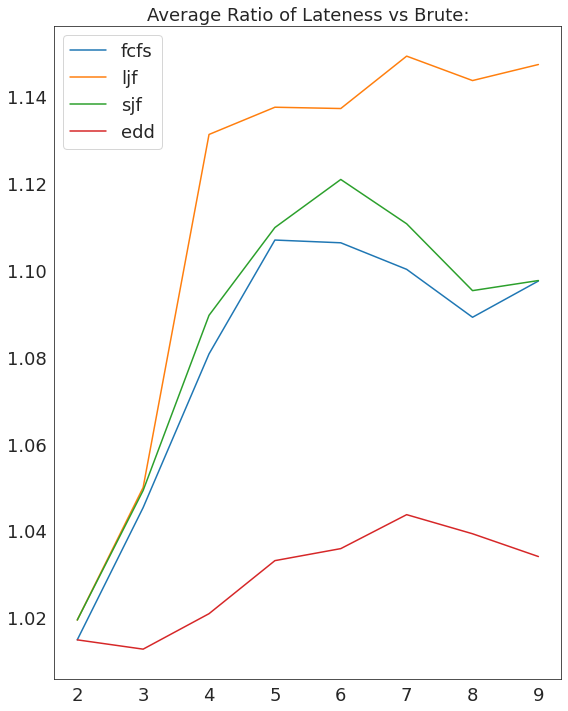

In [ ]:
integer_array=np.arange(start=2,stop=10,step=1)

# Setup for visualization
sns.set_style('white')
sns.color_palette('deep')
plt.figure(figsize=(20,12), tight_layout=False)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('font', size=16)          # controls default text sizes
plt.subplot(1,2,1)

# Plot of Lateness Ratios of each algorithm w.r.t Brute force
plt.title("Average Ratio of Lateness vs Brute:")
plt.plot(integer_array, x_fcfs_lateness, label="fcfs")
plt.plot(integer_array, x_ljf_lateness, label="ljf")
plt.plot(integer_array, x_sjf_lateness, label="sjf")
plt.plot(integer_array, x_edd_lateness, label="edd")
plt.legend(loc="upper left")
plt.show()

### Run Time plot

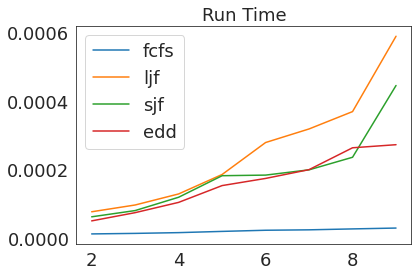

In [ ]:
# Plot of average run times of each algorithm w.r.t n

plt.title("Run Time")
plt.plot(integer_array, x_fcfs_time, label="fcfs")
plt.plot(integer_array, x_ljf_time, label="ljf")
plt.plot(integer_array, x_sjf_time, label="sjf")
plt.plot(integer_array, x_edd_time, label="edd")
plt.legend(loc="upper left")
plt.show()

### Hamming Distance Plot

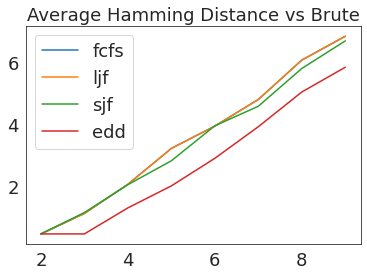

In [ ]:
# Plot of average Hamming Distance of each algorithm w.r.t Brute force

plt.title("Average Hamming Distance vs Brute")
plt.plot(integer_array, x_fcfs_hd, label="fcfs")
plt.plot(integer_array, x_ljf_hd, label="ljf")
plt.plot(integer_array, x_sjf_hd, label="sjf")
plt.plot(integer_array, x_edd_hd, label="edd")
plt.legend(loc="upper left")
plt.show()

### RMS Plot

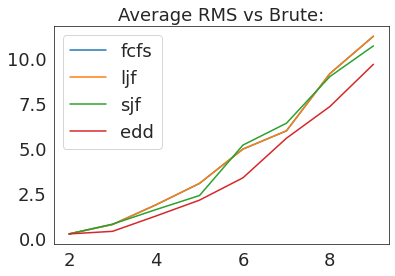

In [ ]:
# Plot of average RMS of each algorithm w.r.t Brute force

plt.title("Average RMS vs Brute:")
plt.plot(integer_array, x_fcfs_rms, label="fcfs")
plt.plot(integer_array, x_ljf_rms, label="ljf")
plt.plot(integer_array, x_sjf_rms, label="sjf")
plt.plot(integer_array, x_edd_rms, label="edd")
plt.legend(loc="upper left")
plt.show()

### Manhattan Distance

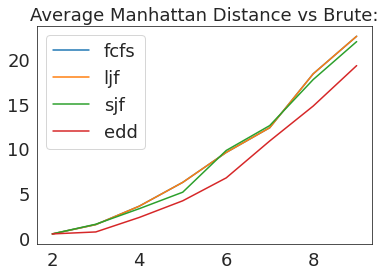

In [ ]:
# Plot of average Manhattan Distance of each algorithm w.r.t Brute force

plt.title("Average Manhattan Distance vs Brute:")
plt.plot(integer_array, x_fcfs_mhn, label="fcfs")
plt.plot(integer_array, x_ljf_mhn, label="ljf")
plt.plot(integer_array, x_sjf_mhn, label="sjf")
plt.plot(integer_array, x_edd_mhn, label="edd")
plt.legend(loc="upper left")
plt.show()

**Observations from the above graphs:**

* For most input instances the approximation ratio for earliest due date first is the lowest. This suggests that the EDD algorithm, generally speaking is the best performing algorithm (gives least max lateness) and LJF is at the other end of the spectrum (gives maximum max lateness).

* This is further confirmed by comparing the best job orders with the optimal job order using the 3 distances. The graphs for average values of EDD are much lower than the other algorithms.